In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [20]:
data = pd.read_csv('data1.csv', nrows = 20000)
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,TARGET,Unnamed: 39
0,2,12983,0,0,0,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
1,0,267,14515,0,0,0,0,0,1,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
2,0,1022,387,0,0,0,0,0,1,0,...,0.11,0.72,0.00,0.00,0.00,0.0,0.72,0.04,normal,21
3,0,327,467,0,0,0,0,0,1,0,...,1.00,0.00,0.01,0.03,0.00,0.0,0.00,0.00,normal,21
4,0,616,330,0,0,0,0,0,1,0,...,0.51,0.03,0.00,0.00,0.00,0.0,0.33,0.00,normal,18


In [21]:
fitur = data.drop('TARGET', axis = 1)
target = data['TARGET']
fitur.shape, target.shape

((9941, 39), (9941,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(fitur, target, test_size = 0.2, random_state = 0)

In [23]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [24]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [25]:
X_train_T.duplicated().sum()

0

In [26]:
duplicated_features = X_train_T.duplicated()

In [27]:
features_to_keep = [not index for index in duplicated_features]
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T
X_train_unique.shape, X_test_unique.shape

((7952, 24), (1989, 24))

In [28]:
mi = mutual_info_classif(X_train_unique, y_train) 
len(mi)

24

In [29]:
mi[: 10]

array([1.75077837e-03, 8.38559677e-02, 5.58873907e-02, 2.62097872e-03,
       0.00000000e+00, 3.39666649e-02, 7.06795961e-05, 5.40853042e-04,
       2.40822910e-02, 4.26272487e-02])

In [30]:
mi = pd.Series(mi)
mi.index = X_train_unique.columns

In [31]:
mi.sort_values(ascending=False, inplace = True)

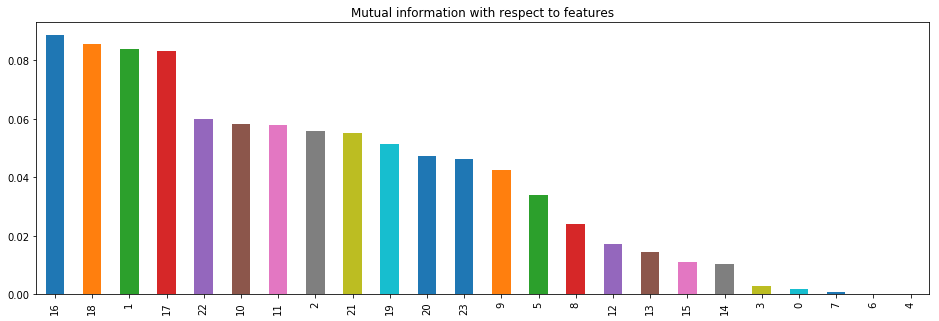

In [32]:
plt.title('Mutual information with respect to features')
mi.plot.bar(figsize = (16,5))
plt.show()

In [33]:
sel = SelectPercentile(mutual_info_classif, percentile=10).fit(X_train_unique, y_train)
X_train_unique.columns[sel.get_support()]

Int64Index([16, 17, 18], dtype='int64')

In [34]:
len(X_train_unique.columns[sel.get_support()])

3

In [35]:
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)
X_train_mi.shape

(7952, 3)